# **Análisis Exploratorio de Datos**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Conectarse con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Carga de datos
df = pd.read_csv('/content/drive/MyDrive/datos_proyecto.csv', sep=';')


In [ ]:
# Exploración inicial
df.head()

,Mes,Cliente,CategoriaMarca,SKU,VtaTon,VtaValor,Departamento,Poblacion,TipologiaCliente,DiaAtencion,CentroDespacho,OficinVentas
0,202401,3001295,CM5,Q1060,0.00720,62657.16,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
1,202401,3001295,CM27,M1083,0.00960,55371.36,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
2,202401,3001302,CM6,Q393,0.00132,13114.32,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
3,202401,3001306,CM6,Q916,0.01920,194285.76,BOGOTÁ,BOGOTÁ D.C.,T16,LU,6038,6030
4,202401,3001306,CM8,Q1280,0.00050,13035.75,BOGOTÁ,BOGOTÁ D.C.,T16,LU,6038,6030


In [6]:
# Información básica del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234289 entries, 0 to 1234288
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Mes               1234289 non-null  int64  
 1   Cliente           1234289 non-null  int64  
 2   CategoriaMarca    1234289 non-null  object 
 3   SKU               1234289 non-null  object 
 4   VtaTon            1234289 non-null  float64
 5   VtaValor          1234289 non-null  float64
 6   Departamento      1234289 non-null  object 
 7   Poblacion         1234289 non-null  object 
 8   TipologiaCliente  1234289 non-null  object 
 9   DiaAtencion       1234289 non-null  object 
 10  CentroDespacho    1234289 non-null  int64  
 11  OficinVentas      1234289 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 113.0+ MB
None


In [7]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())


Resumen estadístico de las variables numéricas:
                Mes       Cliente        VtaTon      VtaValor  CentroDespacho  \
count  1.234289e+06  1.234289e+06  1.234289e+06  1.234289e+06    1.234289e+06   
mean   2.024041e+05  3.028022e+06  3.069266e-02  1.787663e+05    6.035504e+03   
std    1.990772e+00  1.538783e+04  3.111323e-01  1.302653e+06    3.005983e+00   
min    2.024010e+05  3.001295e+06 -2.000000e+00 -8.957606e+06    6.001000e+03   
25%    2.024020e+05  3.013169e+06  1.380000e-03  1.735713e+04    6.033000e+03   
50%    2.024040e+05  3.030708e+06  4.500000e-03  4.330296e+04    6.038000e+03   
75%    2.024060e+05  3.043733e+06  1.600000e-02  1.173809e+05    6.038000e+03   
max    2.024070e+05  3.072785e+06  8.609400e+01  2.623801e+08    6.039000e+03   

       OficinVentas  
count  1.234289e+06  
mean   6.031131e+03  
std    1.433605e+00  
min    6.030000e+03  
25%    6.030000e+03  
50%    6.030000e+03  
75%    6.032000e+03  
max    6.034000e+03  


In [8]:
# Comprobar valores faltantes en cada columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
Mes                 0
Cliente             0
CategoriaMarca      0
SKU                 0
VtaTon              0
VtaValor            0
Departamento        0
Poblacion           0
TipologiaCliente    0
DiaAtencion         0
CentroDespacho      0
OficinVentas        0
dtype: int64


In [9]:
# Comprobar los datos únicos en cada columna categórica
print("\nValores únicos por columna categórica:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()}")


Valores únicos por columna categórica:
CategoriaMarca: 21
SKU: 224
Departamento: 27
Poblacion: 484
TipologiaCliente: 8
DiaAtencion: 6



Distribución de las variables numéricas:


array([[<Axes: title={'center': 'Mes'}>,
        <Axes: title={'center': 'Cliente'}>],
       [<Axes: title={'center': 'VtaTon'}>,
        <Axes: title={'center': 'VtaValor'}>],
       [<Axes: title={'center': 'CentroDespacho'}>,
        <Axes: title={'center': 'OficinVentas'}>]], dtype=object)

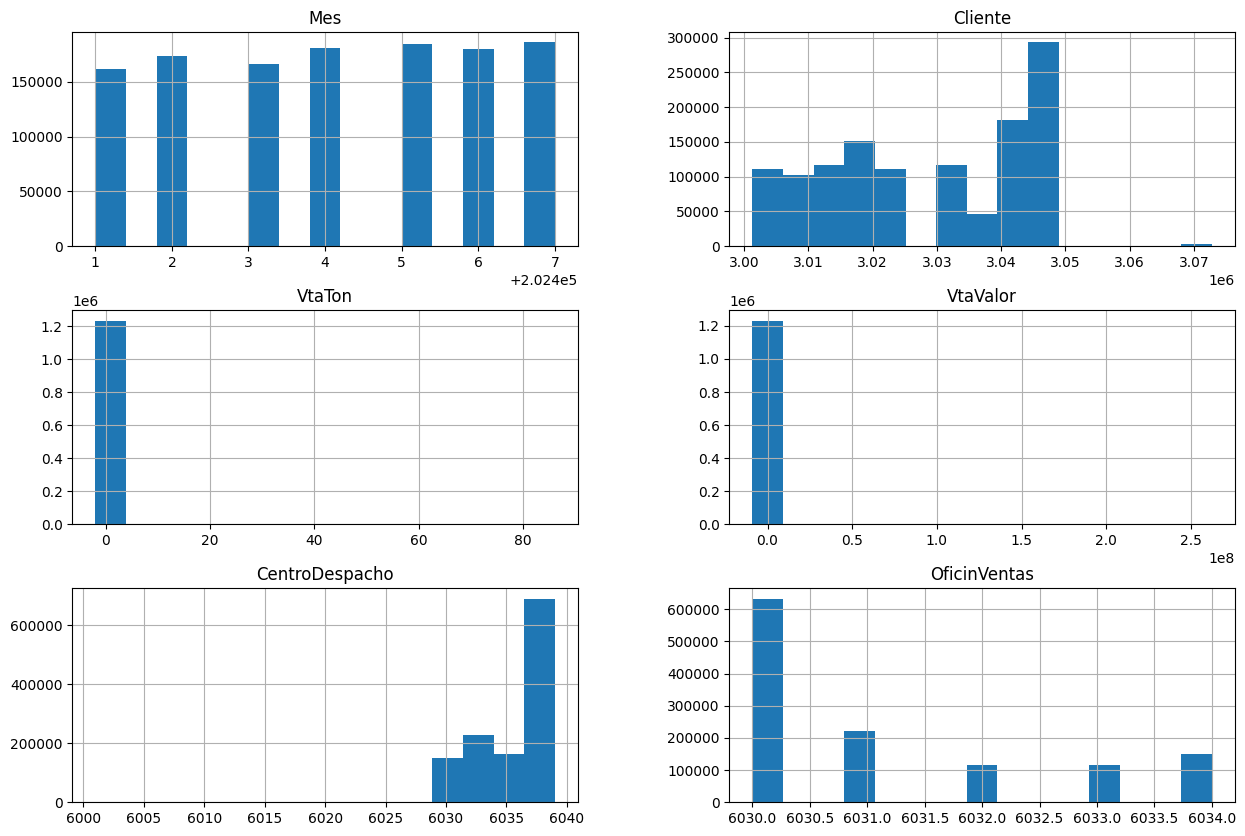

In [10]:
# Distribución de las variables numéricas
print("\nDistribución de las variables numéricas:")
df.hist(bins=15, figsize=(15, 10))

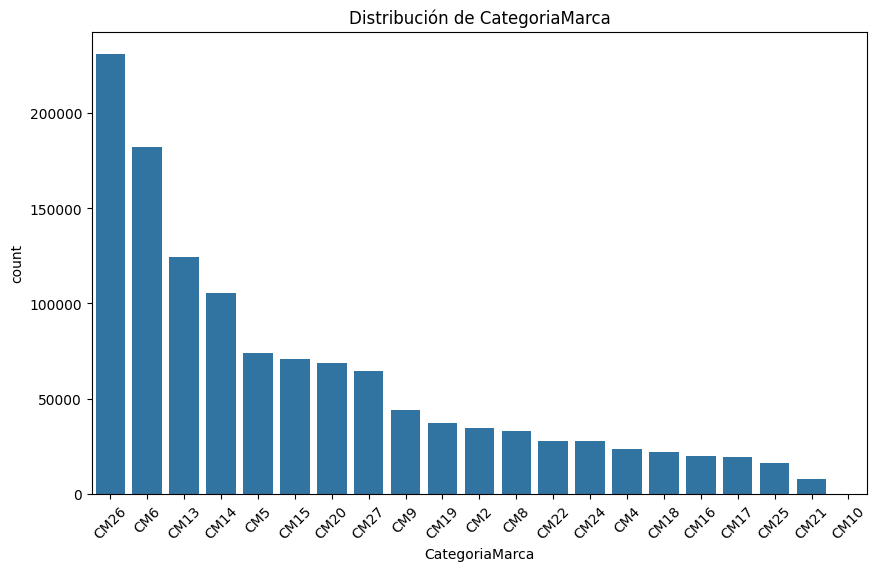

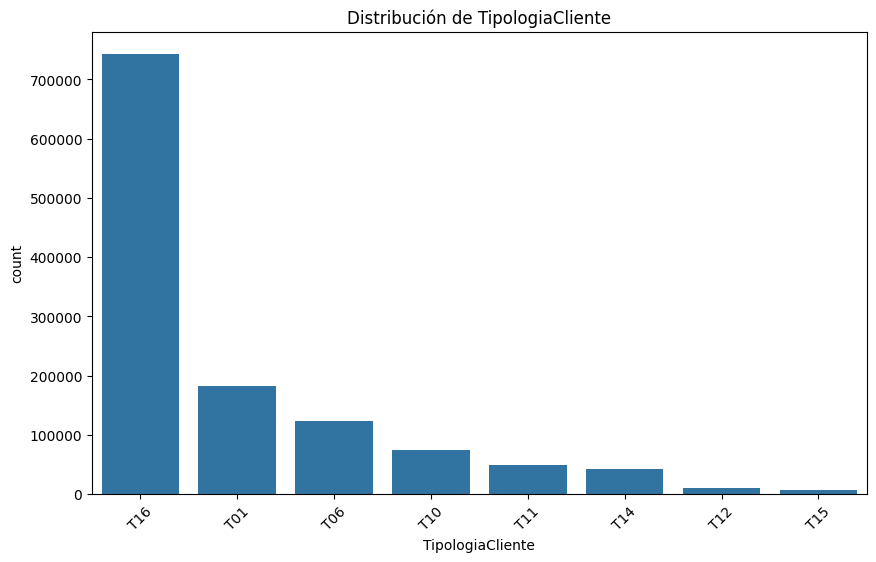

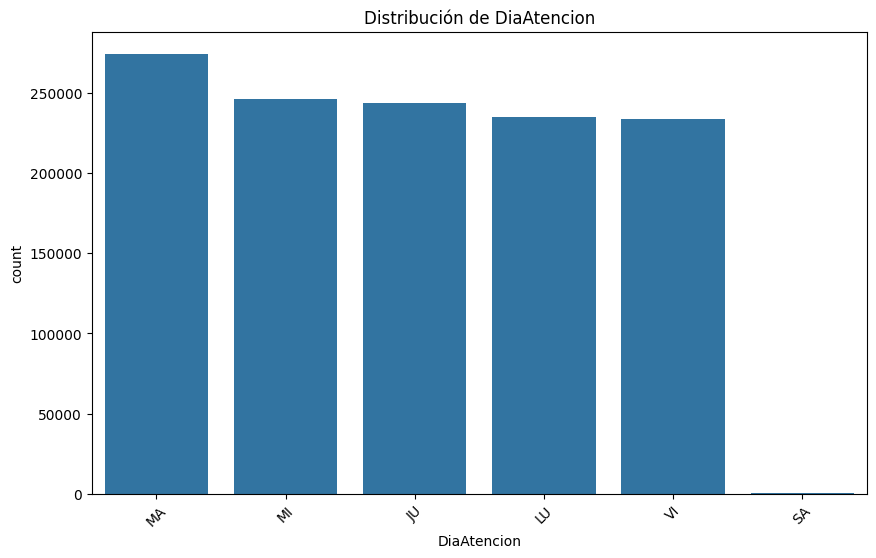

In [11]:
# Lista de columnas categóricas
categorical_columns_to_plot = ['CategoriaMarca', 'TipologiaCliente', 'DiaAtencion']

# Gráfico de barras para cada variable categórica
for column in categorical_columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()


Correlación entre variables numéricas:


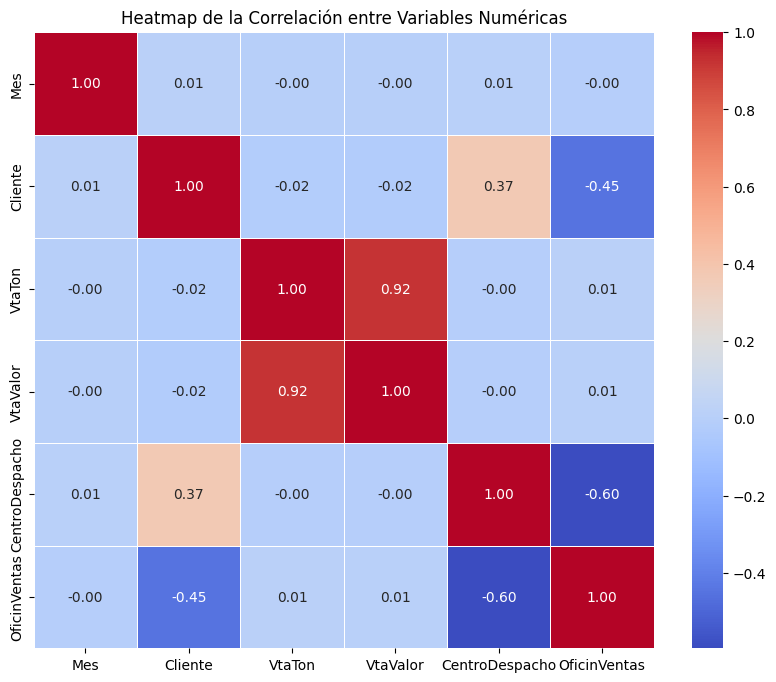

In [12]:
# Calcular la correlación solo entre columnas numéricas
print("\nCorrelación entre variables numéricas:")
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la Correlación entre Variables Numéricas')
plt.show()

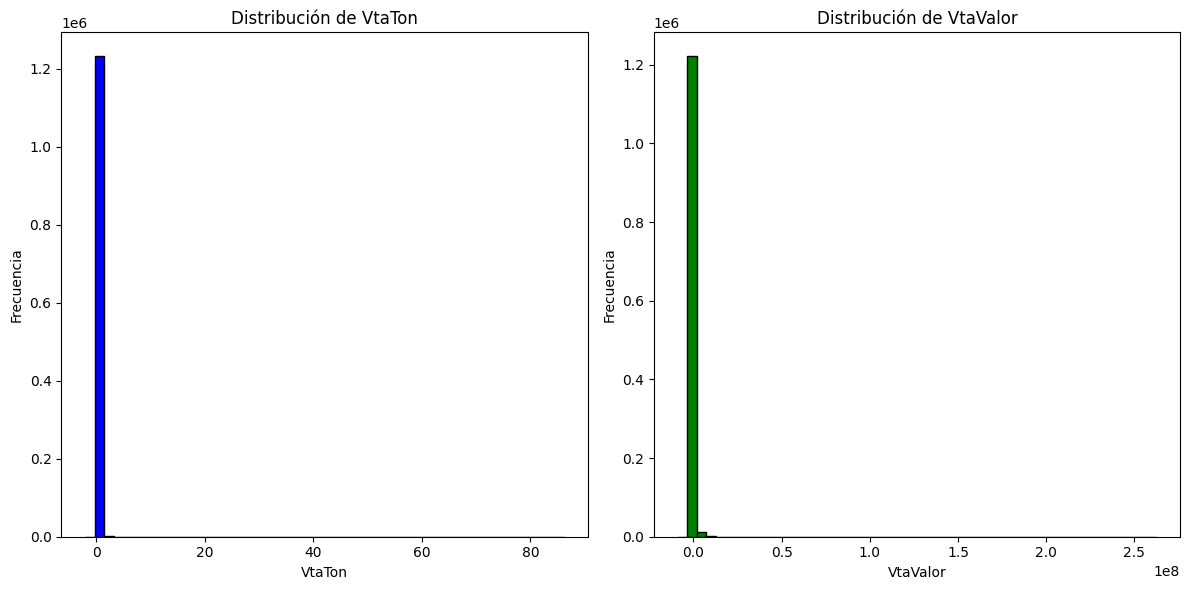

In [13]:
# Plotting the distribution of VtaTon and VtaValor
plt.figure(figsize=(12, 6))

# Distribution for VtaTon
plt.subplot(1, 2, 1)
plt.hist(df['VtaTon'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de VtaTon')
plt.xlabel('VtaTon')
plt.ylabel('Frecuencia')

# Distribution for VtaValor
plt.subplot(1, 2, 2)
plt.hist(df['VtaValor'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de VtaValor')
plt.xlabel('VtaValor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

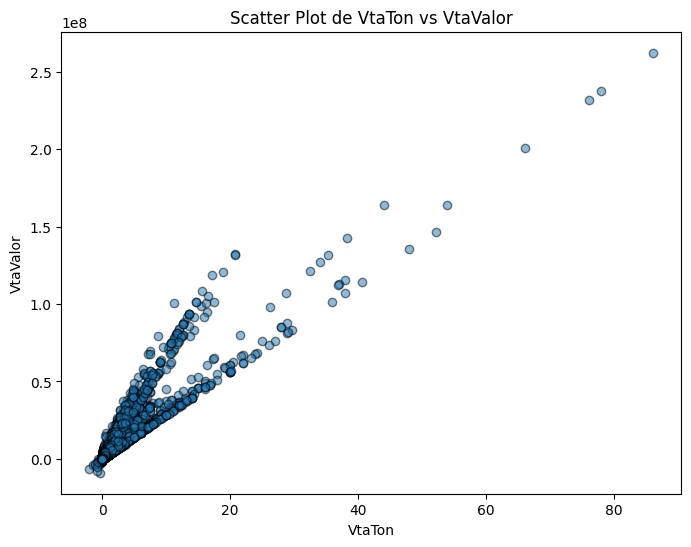

In [15]:
# Crear un scatter plot de VtaTon vs VtaValor
plt.figure(figsize=(8, 6))
plt.scatter(df['VtaTon'], df['VtaValor'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot de VtaTon vs VtaValor')
plt.xlabel('VtaTon')
plt.ylabel('VtaValor')
plt.show()

# **Preparación de datos**

In [16]:
# Agrupar los datos por 'Cliente' y 'SKU', sumando las ventas en toneladas (VtaTon)
df_agg = df.groupby(['Cliente', 'SKU']).agg({'VtaTon': 'sum'}).reset_index()

# Pivotar la tabla para crear la matriz de usuario-producto
matriz_usuario_producto = df_agg.pivot(index='Cliente', columns='SKU', values='VtaTon')

# Rellenar los valores faltantes con 0 (asumimos que los productos no comprados tienen valor 0)
matriz_usuario_producto = matriz_usuario_producto.fillna(0)

# Mostrar la matriz de usuario-producto
matriz_usuario_producto.head()


SKU,D500,D501,D503,D504,D505,D506,H1004,H1011,H1013,H1022,...,Q917,Q958,Q960,Q961,Q964,Q965,Q968,Q969,Q970,Q977
Cliente,,,,,,,,,,,,,,,,,,,,,
3001295,0.0018,0.00000,0.0000,0.0290,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0072,0.0000,0.0000,-0.0007,0.00000,0.0,-0.0003,0.0000,0.0000,0.000
3001302,0.0063,0.00465,0.0000,0.0145,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0058,0.0015,0.0056,0.0000,0.00378,0.0,0.0012,0.0000,0.0000,0.021
3001305,0.0015,0.00045,0.0097,0.0000,0.0,0.0,0.0,0.0,0.0,0.003,...,0.0000,0.0000,0.0000,0.0000,0.00000,0.0,0.0000,0.0000,0.0000,0.000
3001306,0.0000,0.00000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0768,0.0078,0.0098,0.0000,0.00000,0.0,0.0195,0.0207,0.0144,0.108
3001310,0.0087,0.00510,0.0194,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0048,0.0000,0.0000,0.0000,0.00000,0.0,0.0009,0.0018,0.0015,0.000


In [17]:
df_surprise = df_agg[df_agg['VtaTon'] >= 0]
df_surprise.head()

,Cliente,SKU,VtaTon
0,3001295,D500,0.0018
1,3001295,D504,0.0290
2,3001295,H1067,0.0680
3,3001295,H1121,0.0264
4,3001295,H700,2.1970


In [18]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357295 sha256=dedd1e89b30e3f855177250ca7534a632a2070597bc5ee53274cdf94e6d3bb4c
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [19]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV

# Definir el rango de las calificaciones (VtaTon)
reader = Reader(rating_scale=(0, df_surprise['VtaTon'].max()))

# Cargar los datos en el formato de Surprise
data = Dataset.load_from_df(df_surprise[['Cliente', 'SKU', 'VtaTon']], reader)

# Dividir los datos en conjunto de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.25)

# Crear el modelo SVD
svd_model = SVD()

# Entrenar el modelo con el conjunto de entrenamiento
svd_model.fit(trainset)

# Realizar predicciones sobre el conjunto de prueba
predictions = svd_model.test(testset)

# Evaluar el rendimiento del modelo usando RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


RMSE: 1.2874
RMSE: 1.287382881232338


In [23]:
from surprise import SVD, KNNBasic
from surprise.model_selection import GridSearchCV, train_test_split
from surprise import Dataset, Reader
from surprise import accuracy

# Definir el rango de las calificaciones (VtaTon)
reader = Reader(rating_scale=(0, df_surprise['VtaTon'].max()))

# Cargar los datos en el formato de Surprise
data = Dataset.load_from_df(df_surprise[['Cliente', 'SKU', 'VtaTon']], reader)

# Dividir los datos en conjunto de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.25)

# Definir los parámetros a buscar en el GridSearchCV para SVD
param_grid_svd = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30],
    'lr_all': [0.005, 0.010],
    'reg_all': [0.02, 0.1]
}

# Crear el GridSearchCV para SVD
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=3)
gs_svd.fit(data)

# Obtener los mejores parámetros para SVD
print("Mejores parámetros para SVD: ", gs_svd.best_params['rmse'])

# Entrenar el modelo SVD con los mejores parámetros encontrados
best_svd_model = gs_svd.best_estimator['rmse']
best_svd_model.fit(trainset)

# Evaluar el rendimiento del modelo usando RMSE en el conjunto de prueba
svd_predictions = best_svd_model.test(testset)
accuracy.rmse(svd_predictions)

# Parámetros para KNN con diferentes métricas de similitud (sin 'cosine')
param_grid_knn = {
    'k': [20, 30, 40],
    'sim_options': {
        'name': ['msd', 'pearson'],  # Eliminado 'cosine'
        'user_based': [True],  # Usar similitud basada en usuarios
        'min_support': [1]
    }
}

# Crear el GridSearchCV para KNN
gs_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse'], cv=3)
gs_knn.fit(data)

# Obtener los mejores parámetros para KNN
print("Mejores parámetros para KNN: ", gs_knn.best_params['rmse'])

# Entrenar el modelo KNN con los mejores parámetros encontrados
best_knn_model = gs_knn.best_estimator['rmse']
best_knn_model.fit(trainset)

# Evaluar el rendimiento del modelo KNN en el conjunto de prueba
knn_predictions = best_knn_model.test(testset)
accuracy.rmse(knn_predictions)

# Obtener recomendaciones para 10 clientes con el modelo SVD
clientes = df_surprise['Cliente'].unique()[:10]

for cliente in clientes:
    # Obtener todos los ítems (SKU) que no han sido calificados por el cliente
    productos = df_surprise['SKU'].unique()
    productos_calificados = [pred.iid for pred in svd_predictions if pred.uid == cliente]
    productos_no_calificados = [item for item in productos if item not in productos_calificados]

    # Hacer predicciones para los ítems no calificados
    predicciones_cliente = [best_svd_model.predict(cliente, item) for item in productos_no_calificados]

    # Ordenar las predicciones por la calificación estimada
    predicciones_cliente.sort(key=lambda x: x.est, reverse=True)

    # Mostrar las 5 mejores recomendaciones para el cliente
    print(f'Recomendaciones para el cliente {cliente} con SVD:')
    for pred in predicciones_cliente[:5]:
        print(f'Producto: {pred.iid}, Calificación estimada: {pred.est}')
    print("\n")


Mejores parámetros para SVD:  {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}
RMSE: 0.6819
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similari

In [20]:
from surprise import SVD, KNNBasic
from surprise.model_selection import GridSearchCV, train_test_split
from surprise import Dataset, Reader
from surprise import accuracy

# Definir el rango de las calificaciones (VtaTon)
reader = Reader(rating_scale=(0, df_surprise['VtaTon'].max()))

# Cargar los datos en el formato de Surprise
data = Dataset.load_from_df(df_surprise[['Cliente', 'SKU', 'VtaTon']], reader)

# Dividir los datos en conjunto de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.25)

# Definir los parámetros a buscar en el GridSearchCV para SVD
param_grid_svd = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30],
    'lr_all': [0.005, 0.010],
    'reg_all': [0.02, 0.1]
}

# Crear el GridSearchCV para SVD
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=3)
gs_svd.fit(data)

# Obtener los mejores parámetros para SVD
print("Mejores parámetros para SVD: ", gs_svd.best_params['rmse'])

# Entrenar el modelo SVD con los mejores parámetros encontrados
best_svd_model = gs_svd.best_estimator['rmse']
best_svd_model.fit(trainset)

# Evaluar el rendimiento del modelo usando RMSE en el conjunto de prueba
svd_predictions = best_svd_model.test(testset)
accuracy.rmse(svd_predictions)

# Parámetros para KNN con diferentes métricas de similitud
param_grid_knn = {
    'k': [20, 30, 40],
    'sim_options': {
        'name': ['cosine', 'msd', 'pearson'],
        'user_based': [True], # Usar similitud basada en usuarios
        'min_support': [1]
    }
}

# Crear el GridSearchCV para KNN
gs_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse'], cv=3)
gs_knn.fit(data)

# Obtener los mejores parámetros para KNN
print("Mejores parámetros para KNN: ", gs_knn.best_params['rmse'])

# Entrenar el modelo KNN con los mejores parámetros encontrados
best_knn_model = gs_knn.best_estimator['rmse']
best_knn_model.fit(trainset)

# Evaluar el rendimiento del modelo KNN en el conjunto de prueba
knn_predictions = best_knn_model.test(testset)
accuracy.rmse(knn_predictions)

# Obtener recomendaciones para 10 clientes con el modelo SVD
clientes = df_surprise['Cliente'].unique()[:10]

for cliente in clientes:
    # Obtener todos los ítems (SKU) que no han sido calificados por el cliente
    productos = df_surprise['SKU'].unique()
    productos_calificados = [pred.iid for pred in svd_predictions if pred.uid == cliente]
    productos_no_calificados = [item for item in productos if item not in productos_calificados]

    # Hacer predicciones para los ítems no calificados
    predicciones_cliente = [best_svd_model.predict(cliente, item) for item in productos_no_calificados]

    # Ordenar las predicciones por la calificación estimada
    predicciones_cliente.sort(key=lambda x: x.est, reverse=True)

    # Mostrar las 5 mejores recomendaciones para el cliente
    print(f'Recomendaciones para el cliente {cliente} con SVD:')
    for pred in predicciones_cliente[:5]:
        print(f'Producto: {pred.iid}, Calificación estimada: {pred.est}')
    print("\n")


Mejores parámetros para SVD:  {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.02}
RMSE: 1.2763
Computing the cosine similarity matrix...


ZeroDivisionError: float division

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances

# Normalizar la matriz de usuario-producto restando la media por usuario
matriz_normalizada = matriz_usuario_producto.sub(matriz_usuario_producto.mean(axis=1), axis=0)

# Definir posibles valores de hiperparámetros
n_neighbors_list = [5, 10, 15, 20]
metric_list = ['cosine', 'euclidean', 'manhattan']

# Función para evaluar el modelo usando similitud entre usuarios
def evaluar_modelo(n_neighbors, metric):
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric, algorithm='auto')
    knn.fit(matriz_normalizada.fillna(0))

    # Calcular la similitud entre usuarios (o la distancia) usando la métrica seleccionada
    distances, indices = knn.kneighbors(matriz_normalizada.fillna(0))

    # Evaluar la similitud promedio entre los vecinos más cercanos
    similitud_promedio = 1 - distances.mean()  # Si usamos 'cosine', la similitud es 1 - distancia
    return similitud_promedio

# Buscar los mejores hiperparámetros basados en la similitud promedio
mejor_similitud = -1  # Inicializamos con un valor muy bajo
mejores_hiperparametros = {}

for n_neighbors in n_neighbors_list:
    for metric in metric_list:
        similitud = evaluar_modelo(n_neighbors, metric)
        print(f"Evaluando n_neighbors={n_neighbors}, metric={metric}, similitud={similitud}")
        if similitud > mejor_similitud:
            mejor_similitud = similitud
            mejores_hiperparametros = {'n_neighbors': n_neighbors, 'metric': metric}

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", mejores_hiperparametros)

# Ahora ajustamos el modelo con los mejores hiperparámetros
knn_mejor = NearestNeighbors(n_neighbors=mejores_hiperparametros['n_neighbors'],
                             metric=mejores_hiperparametros['metric'],
                             algorithm='auto')
knn_mejor.fit(matriz_normalizada.fillna(0))



# Función para recomendar productos a un usuario basado en los vecinos más similares
def recomendar_productos(usuario_id, num_recomendaciones=5):
    # Obtener la fila correspondiente al usuario en la matriz normalizada
    usuario_data = matriz_normalizada.loc[usuario_id]
    # Convertir a DataFrame y asignar nombres de columnas
    usuario_data = pd.DataFrame(usuario_data.values.reshape(1, -1), columns=matriz_normalizada.columns)

    # Obtener las similitudes del usuario con otros usuarios
    distances, indices = knn_mejor.kneighbors(usuario_data,
                                            n_neighbors=mejores_hiperparametros['n_neighbors'])

    # Extraemos los índices de los usuarios más similares
    usuarios_similares = matriz_usuario_producto.index[indices.flatten()]

    # Calcular la recomendación ponderada
    recomendacion_ponderada = matriz_usuario_producto.loc[usuarios_similares].mul(1 / (distances.flatten() + 1e-6), axis=0).sum()

    # Filtrar productos que ya compró el usuario para no recomendarlos de nuevo
    productos_comprados = matriz_usuario_producto.loc[usuario_id]
    recomendacion_ponderada = recomendacion_ponderada[productos_comprados == 0]

    # Devolver los productos mejor puntuados
    return recomendacion_ponderada.nlargest(num_recomendaciones)

# Generar recomendaciones para varios usuarios
usuarios_a_recomendar = matriz_usuario_producto.index[:5]  # Elegir los primeros 5 usuarios como ejemplo

# Mostrar recomendaciones para cada usuario
for usuario_id in usuarios_a_recomendar:
    print(f"\nRecomendaciones para el usuario {usuario_id}:")
    print(recomendar_productos(usuario_id))


Evaluando n_neighbors=5, metric=cosine, similitud=0.9261182354741235
Evaluando n_neighbors=5, metric=euclidean, similitud=0.40184148291448774
Evaluando n_neighbors=5, metric=manhattan, similitud=-1.7381320858784552
Evaluando n_neighbors=10, metric=cosine, similitud=0.9046446071523273
Evaluando n_neighbors=10, metric=euclidean, similitud=0.2433827725817579
Evaluando n_neighbors=10, metric=manhattan, similitud=-2.4451611269683413
Evaluando n_neighbors=15, metric=cosine, similitud=0.8926159152609126
Evaluando n_neighbors=15, metric=euclidean, similitud=0.15639455743462416
Evaluando n_neighbors=15, metric=manhattan, similitud=-2.8249051607280466
Evaluando n_neighbors=20, metric=cosine, similitud=0.883988712359412
Evaluando n_neighbors=20, metric=euclidean, similitud=0.0956998775961706
Evaluando n_neighbors=20, metric=manhattan, similitud=-3.0896841785513933
Mejores hiperparámetros encontrados: {'n_neighbors': 5, 'metric': 'cosine'}

Recomendaciones para el usuario 3001295:
SKU
H1058    22.

# **Gráfico de la similitud promedio**

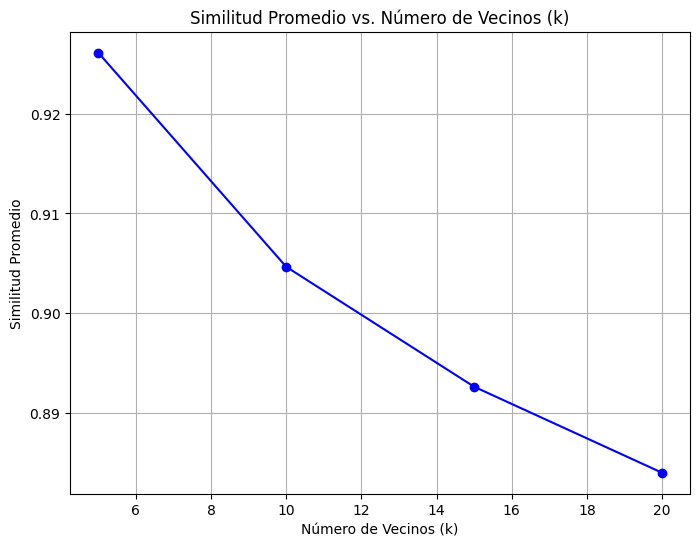

In [ ]:
# Lista para almacenar los resultados de similitud promedio para cada valor de n_neighbors
resultados_similitud = []

# Evaluar similitud promedio para diferentes valores de k
for n_neighbors in n_neighbors_list:
    similitud = evaluar_modelo(n_neighbors, 'cosine')  # Podemos ajustar la métrica si es necesario
    resultados_similitud.append(similitud)

# Gráfico de similitud promedio vs. número de vecinos (k)
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_list, resultados_similitud, marker='o', linestyle='-', color='b')
plt.title('Similitud Promedio vs. Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Similitud Promedio')
plt.grid(True)
plt.show()


# **Matriz de similitud como Heatmap**

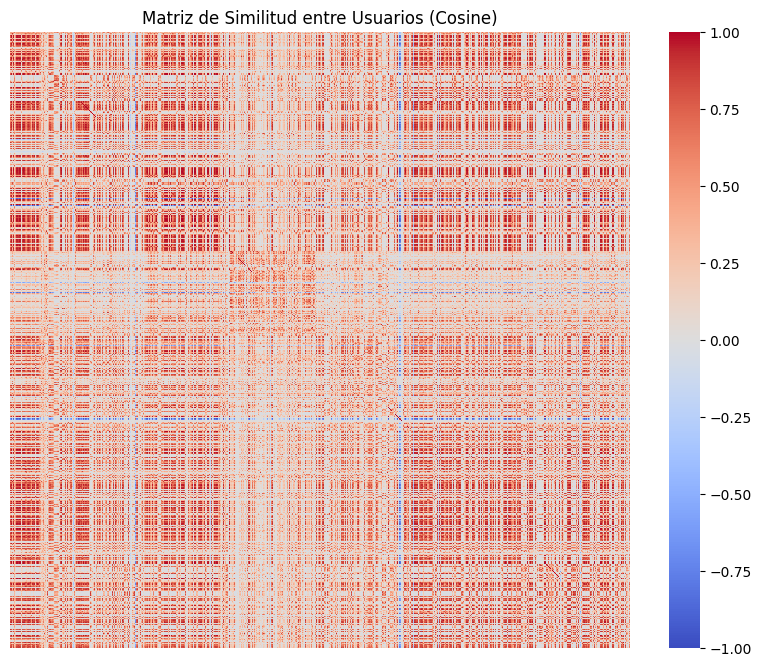

In [ ]:
# Calcular la similitud entre usuarios usando k-NN y métrica 'cosine'
distances, indices = knn_mejor.kneighbors(matriz_normalizada.fillna(0))

# Crear una matriz de similitud a partir de las distancias (1 - distancia)
similitud_matrix = 1 - pairwise_distances(matriz_normalizada.fillna(0), metric='cosine')

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similitud_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Matriz de Similitud entre Usuarios (Cosine)')
plt.show()

# **Validación de recomendaciones**

Usuario 3040183:
Recomendaciones: ['M1102', 'Q565', 'H1084', 'D504', 'H1083']
Productos Reales: ['D500', 'D501', 'H1058', 'H1067', 'H1121', 'H700', 'H701', 'H704', 'H714', 'H730', 'H731', 'H783', 'H913', 'H914', 'H933', 'M1000', 'M1001', 'M1003', 'M1074', 'M1076', 'M1080', 'M1083', 'M1086', 'M1089', 'M1101', 'M1103', 'M1111', 'M1112', 'M1115', 'M1120', 'M1121', 'M1123', 'M500', 'M501', 'M509', 'M511', 'M526', 'M527', 'M563', 'M564', 'M566', 'M567', 'M569', 'M570', 'M572', 'M573', 'M619', 'M620', 'M621', 'M622', 'M678', 'M685', 'M709', 'M811', 'M812', 'M823', 'M825', 'M827', 'M850', 'M853', 'M854', 'M855', 'M857', 'M866', 'M872', 'M878', 'M879', 'M880', 'M898', 'M939', 'M940', 'M941', 'M973', 'M999', 'Q1038', 'Q1039', 'Q1056', 'Q1057', 'Q1059', 'Q1060', 'Q1069', 'Q1070', 'Q1073', 'Q1074', 'Q1104', 'Q1105', 'Q1167', 'Q1168', 'Q1190', 'Q1191', 'Q1192', 'Q1196', 'Q1197', 'Q1199', 'Q1204', 'Q1264', 'Q1272', 'Q1277', 'Q1278', 'Q1280', 'Q1281', 'Q1291', 'Q1292', 'Q1318', 'Q1319', 'Q393', 'Q42

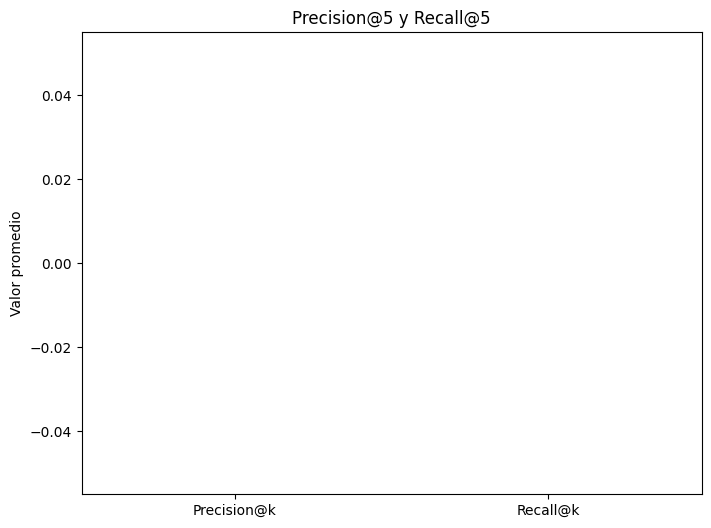

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos la matriz de usuario-producto en entrenamiento (80%) y prueba (20%)
matriz_entrenamiento, matriz_prueba = train_test_split(matriz_usuario_producto, test_size=0.2)

# Función para calcular recall@k
def recall_at_k(recomendaciones, productos_reales, k):
    recomendaciones_top_k = recomendaciones[:k]
    productos_reales_set = set(productos_reales)
    recomendaciones_top_k_set = set(recomendaciones_top_k)

    hits = recomendaciones_top_k_set.intersection(productos_reales_set)

    # Recall = hits / número de productos relevantes (comprados realmente)
    return len(hits) / len(productos_reales_set) if len(productos_reales_set) > 0 else 0

# Validar las recomendaciones usando precision@k y recall@k
k = 5  # Número de recomendaciones que evaluaremos

# Listas para almacenar los resultados de precisión y recall para todos los usuarios
precision_total = []
recall_total = []

# Ajustar el modelo k-NN con una métrica diferente (euclidean o manhattan)
n_neighbors = 20
metric = 'cosine'  # Cambiar a 'euclidean' o 'manhattan' para probar

knn_mejor = NearestNeighbors(n_neighbors=n_neighbors, metric=metric, algorithm='auto')
knn_mejor.fit(matriz_normalizada.fillna(0))

# Repetir el proceso de generación de recomendaciones y validación
for usuario_id in matriz_prueba.index[:5]:  # Probar con los primeros 5 usuarios
    recomendaciones = recomendar_productos(usuario_id)
    productos_reales = matriz_prueba.columns[matriz_prueba.loc[usuario_id] > 0].tolist()

    print(f"Usuario {usuario_id}:")
    print("Recomendaciones:", recomendaciones.index.tolist())
    print("Productos Reales:", productos_reales)

    # Comprobamos si hay algún cruce entre las recomendaciones y los productos comprados
    interseccion = set(recomendaciones.index.tolist()).intersection(set(productos_reales))
    print(f"Intersección: {interseccion}\n")

# Resultados promedio de precision@k y recall@k
precision_promedio = np.mean(precision_total) if len(precision_total) > 0 else 0
recall_promedio = np.mean(recall_total) if len(recall_total) > 0 else 0

print(f"Precision@{k}: {precision_promedio}")
print(f"Recall@{k}: {recall_promedio}")

# Gráfico Precision@k vs Recall@k
plt.figure(figsize=(8, 6))
plt.bar(["Precision@k", "Recall@k"], [precision_promedio, recall_promedio], color=['blue', 'green'])
plt.title(f"Precision@{k} y Recall@{k}")
plt.ylabel("Valor promedio")
plt.show()